<h1>Ciência dos Dados - 2021.1: Projeto 2</h1>
<h2>Previsão de metascore a partir de dados secundários</h2>

<h3>Integrantes:</h3>

- Gabriel Hideki Stanzani Onishi
- Lucca de Paiva Barroso Saraiva

<h2>Objetivos do Projeto</h2>

A arte é integral para a evolução do ser humano. Expressar-se através de um poema, de um desenho ou de um filme é parte do que nos faz únicos nesse planeta. Não é a toa que para alguns filósofos, como o alemão Friedrich Nietzsche, a arte é o motor que nos faz evoluir como espécie, sendo a nossa esperança de chegar na melhor versão de nós mesmos. Tão notável quanto a arte em si, contudo, é a impressão que a acompanha.

Todos saímos de um filme com uma impressão diferente, mas são poucos que tem a sua opinião validada e levada para milhares de outras pessoas. Críticos são os responsáveis pela dificílima tarefa de fazer o julgamento mais próximo da verdade e transmiti-lo para aqueles que ainda não puderam experenciar a obra (além daqueles que querem ter o seu julgamento comparado, é claro). Não há, entretanto, um conjunto de regras que esses profissionais tenham que seguir$^1$ para resumir em uma nota algo tão subjetivo quanto um filme, o que faz com que certos vieses manifestem-se.

Um exemplo claro está presente na maior premiação anual de cinema. Os prêmios da Academia de Cinema dos Estados Unidos ou, como são popularmente conhecidos, os Oscars, tem um segredo que poucos sabem. Os vencedores de melhor filme do evento seguem um notável padrão, e filmes que o respeitam recebem até receberam um apelido: "Oscar Baits", ou Iscas de Oscar. Em um estudo mencionado nesse <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo</a> da Business Insider revela que assustadores 94% dos vencedores pertencem à categoria drama contra apenas 2% de filmes de ação e aventura. Além disso, o texto sugere que há uma preferência para filmes longos (e portanto teoricamente mais importantes) - 76% dos vencedores desde 1960 têm mais de duas horas de duração.

Munidos da curiosidade de verificar esses viéses em uma base de dados maior, os alunos se propuseram a analisar um conjunto de mais de 80 mil filmes para que, através de dados secundários (como gênero, duração, país de origem e língua principal), seja possível estimar o metascore$^2$ de outros longas. Esperamos que esse estudo sirva de inspiração para que se desmistifique a nota de críticos como autoridades absolutas, dando mais conforto para que aqueles que gostem de cinema possam ter opinião própria sem precisar se basear em reviews.

$^1$É claro que houve tentativas na história da filosofia de se padronizar a forma de crítica da arte. O empirista escocês David Hume foi um dos teóricos dessa área, tendo escrito uma série de regras para que o "tastemaker" (ou fazedor de gosto, numa tradução literal) chegue o mais próximo possível de uma resenha informal acerca do objeto estudado.<br>
$^2$Metascore é uma nota atribuida sobre uma obra pelo site Metascore. Para a nota final, leva-se em conta um conjunto de críticas de meios de comunicação

<h2> Parte 0: Importando elementos</h2>

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats

In [2]:
# Importando planilha de dados brutos
dados_bruto = pd.read_csv('IMDb movies.csv')
#Mostrando o dataset inicial
dados_bruto.head()

C:\Users\Gabriel Onishi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


<h2>Parte I: Limpeza inicial</h2>

In [4]:
#Seleção de Colunas relevantes
dados = dados_bruto[['original_title','duration','year', 'genre', 'country', 'language','worlwide_gross_income','budget', 'metascore' ]]

#Remoção de valores nulos (NaN)
dados = dados.dropna()
dados

,original_title,duration,year,genre,country,language,worlwide_gross_income,budget,metascore
506,Metropolis,153,1927,"Drama, Sci-Fi",Germany,German,$ 1349711,DEM 6000000,98.0
628,The Circus,72,1928,"Comedy, Romance",USA,English,$ 26916,$ 900000,90.0
1048,City Lights,87,1931,"Comedy, Drama, Romance",USA,English,$ 46008,$ 1500000,99.0
1086,Frankenstein,70,1931,"Drama, Horror, Romance",USA,"English, Latin",$ 1626,$ 291000,91.0
1301,Freaks,64,1932,"Drama, Horror",USA,"English, German, French",$ 4072,$ 310607,80.0
...,...,...,...,...,...,...,...,...,...
85397,Jexi,84,2019,"Comedy, Romance","USA, Canada",English,$ 9341824,$ 5000000,39.0
85460,Tenki no ko,112,2019,"Animation, Drama, Family","Japan, China",Japanese,$ 193176979,$ 11100000,72.0
85503,Tommaso,115,2019,Drama,"Italy, UK, USA, Greece","English, Italian, Russian",$ 23588,EUR 3000000,66.0
85592,Quezon's Game,127,2018,"Drama, History",Philippines,English,$ 5986,$ 500000,36.0


In [5]:
#analisando o tipo de dados de cada uma das colunas
dados.dtypes

original_title            object
duration                   int64
year                      object
genre                     object
country                   object
language                  object
worlwide_gross_income     object
budget                    object
metascore                float64
dtype: object

In [6]:
#Fazendo seleção de uma planilha de treinamento com filmes do ano de 1985 - 2000
#Dessa forma minimizamos a depreciação do dinheiro (inflação)

#todos dados estão como object, por isso é necessário trocar para os tipos de variáveis adequados
dados.year = dados.year.astype('int')
dados = dados.loc[(dados.year>=1985) & (dados.year<=2000),:]
dados.head()

,original_title,duration,year,genre,country,language,worlwide_gross_income,budget,metascore
21389,The Falcon and the Snowman,131,1985,"Biography, Crime, Drama","UK, USA, Mexico",English,$ 17130087,$ 12000000,68.0
21425,Godzilla 1985,82,1985,"Action, Horror, Sci-Fi",Japan,"Japanese, Russian, English",$ 4116395,$ 2000000,31.0
21784,After Hours,97,1985,"Comedy, Crime, Drama",USA,English,$ 10609321,$ 4500000,90.0
21785,Agnes of God,98,1985,"Drama, Mystery",USA,"English, French, Latin",$ 25627836,$ 10000000,52.0
21795,American Ninja,95,1985,"Action, Adventure, Romance","USA, Philippines","English, Spanish, Japanese",$ 10499694,$ 1000000,20.0


In [7]:
# Selecionando apenas filmes com budget medido em dólar (começa com $) para uniformizar
dados = dados.loc[dados.budget.str.startswith('$'),:]

#Removendo cifrão da tabela de bilheteria e budget para trabalharmos com float
#Removendo vírgulas das colunas de gênero, country e language para guardarmos eles em variáveis adequadas
def removepont(text):
    cif = '[$,]' 
    pattern = re.compile(cif)
    text_subbed = re.sub(pattern,'', text)
    return text_subbed

dados.worlwide_gross_income = dados.worlwide_gross_income.apply(removepont)
dados.budget = dados.budget.apply(removepont)
dados.genre = dados.genre.apply(removepont)
dados.country = dados.country.apply(removepont)
dados.language = dados.language.apply(removepont)
dados.worlwide_gross_income = dados.worlwide_gross_income.astype('float')
dados.year = dados.year.astype('int')
dados.budget = dados.budget.astype('float')

In [9]:
#criando uma coluna para cada tipo de gênero (selecionamos apenas 3 que consideramos os principais)
dados['drama'] = 'não'
dados['comedy'] = 'não'
dados['action'] = 'não'
dados

,original_title,duration,year,genre,country,language,worlwide_gross_income,budget,metascore,drama,comedy,action
21389,The Falcon and the Snowman,131,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,não,não,não
21425,Godzilla 1985,82,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,não,não,não
21784,After Hours,97,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,não,não,não
21785,Agnes of God,98,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,não,não,não
21795,American Ninja,95,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,não,não,não
...,...,...,...,...,...,...,...,...,...,...,...,...
38782,Digimon: The Movie,82,2000,Animation Action Adventure,USA Japan,English,16643191.0,5000000.0,20.0,não,não,não
38798,Roozi ke zan shodam,78,2000,Comedy Drama,Iran,Persian,149971.0,180000.0,84.0,não,não,não
38898,George Washington,89,2000,Drama,USA,English,283846.0,42000.0,82.0,não,não,não
39130,Batoru rowaiaru,114,2000,Action Adventure Drama,Japan,Japanese,958989.0,4500000.0,81.0,não,não,não


In [10]:
# reindexando as linhas para facilitar trabalho
dados.reset_index(inplace=True)

In [11]:
#lendo a coluna genre de cada linha e vendo a qual gênero pertence
for i in range(len(dados)):
    for genre in dados.iloc[i].genre.split():
        if genre == 'Drama':
            dados.at[i,'drama'] = 'sim'
        if genre == 'Comedy':
            dados.at[i,'comedy'] = 'sim'
        if genre == 'Action':
            dados.at[i,'action'] = 'sim'

In [13]:
dados.head(5)

,index,original_title,duration,year,genre,country,language,worlwide_gross_income,budget,metascore,drama,comedy,action
0,21389,The Falcon and the Snowman,131,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,sim,não,não
1,21425,Godzilla 1985,82,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,não,não,sim
2,21784,After Hours,97,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,sim,sim,não
3,21785,Agnes of God,98,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,sim,não,não
4,21795,American Ninja,95,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,não,não,sim


In [14]:
#Fazendo o mesmo processo para língua e para país de origem
#Buscamos diferenciar filmes feitos nos EUA do resto do mundo e filmes em ingles com filmes em língua estrangeiros
dados['americano'] = 'não'
dados['em_ingles'] = 'não'

In [15]:
for i in range(len(dados)):
    for country in dados.iloc[i].country.split():
        if country == 'USA':
            dados.at[i,'americano'] = 'sim'
        else:
            dados.at[i,'americano'] = 'não'
    for lang in dados.iloc[i].language.split():
        if lang =='English':
            dados.at[i,'em_ingles'] = 'sim'
        else:
            dados.at[i,'em_ingles'] = 'não'

<h2>Parte 2: Análise Exploratória</h2>

<h3>Analisando Distribuição de Metascore</h3>

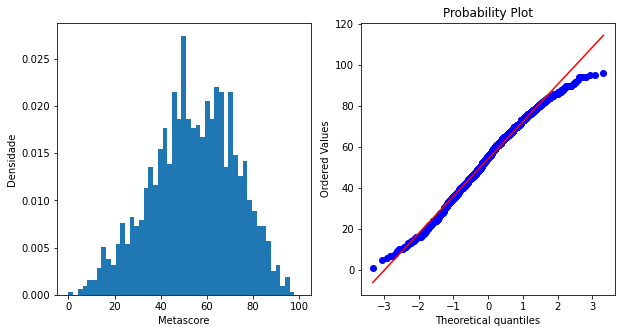

In [21]:
# Fazendo análise da distribuição do metascore
plt.figure(figsize=(10,5))

plt.subplot(121)
faixa = np.linspace(0,100,50)
plt.hist(dados.metascore,density=True,bins=faixa)
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(122)
stats.probplot(dados.metascore,dist='norm',plot=plt)
plt.show()

Como se pode observar, o metascore tem uma distribuição próxima à normal, apesar de ter caudas mais expressivas

<h3> Analisando Correlação Metascore-Duração

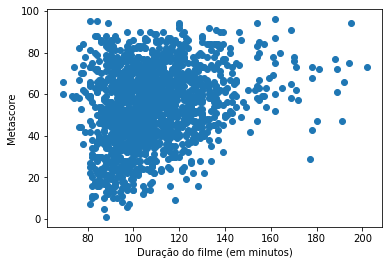

In [22]:
plt.scatter(dados.duration,dados.metascore)
plt.xlabel('Duração do filme (em minutos)')
plt.ylabel('Metascore')
plt.show()

In [19]:
dados.duration.corr(dados.metascore)

0.274226574225181

<h3>Analisando Correlação Metascore-Orçamento

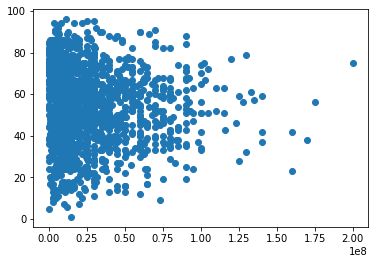

In [17]:
plt.scatter(dados.budget,dados.metascore)
plt.show()

In [16]:
dados.budget.corr(dados.metascore)

-0.07491186540620551

O orçamento não parece ter um efeito muito grande no metascore.

<h3>Analisando Para Gêneros Diferentes</h3>

In [17]:
filme_acao = dados.loc[dados.action=='sim']
filme_drama = dados.loc[dados.drama=='sim']
filme_comedia = dados.loc[dados.comedy=='sim']

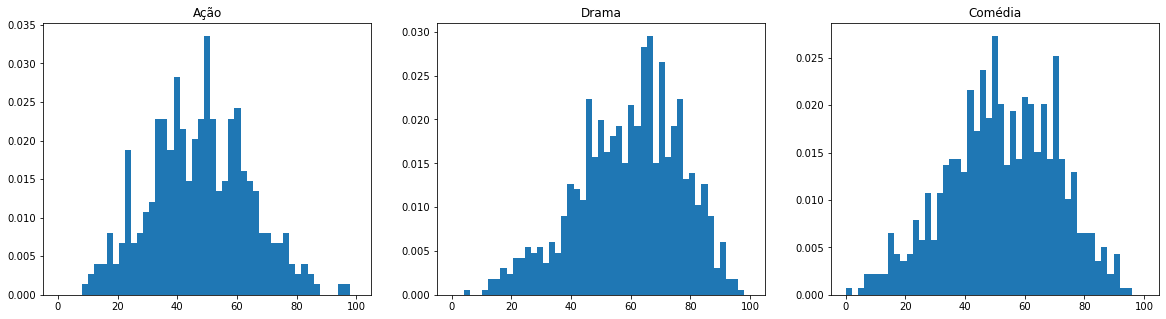

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(filme_acao.metascore,density=True,bins=faixa)
plt.title('Ação')

plt.subplot(132)
plt.hist(filme_drama.metascore,density=True,bins=faixa)
plt.title('Drama')

plt.subplot(133)
plt.hist(filme_comedia.metascore,density=True,bins=faixa)
plt.title('Comédia')

plt.show()

In [19]:
print(f'A média do metascore de filmes da categoria drama é {filme_drama.metascore.mean()}')
print(f'A média do metascore de filmes da categoria comédia é {filme_comedia.metascore.mean()}')
print(f'A média do metascore de filmes da categoria ação é {filme_acao.metascore.mean()}')

A média do metascore de filmes da categoria drama é 59.55965559655596
A média do metascore de filmes da categoria comédia é 52.38563049853372
A média do metascore de filmes da categoria ação é 47.50958904109589


<h3>Analisando Para Línguas e Países Diferentes</h3>

In [20]:
filme_americano = dados.loc[dados.americano=='sim']
filme_estrangeiro = dados.loc[dados.americano=='não']
filme_em_ingles = dados.loc[dados.em_ingles=='sim']
filme_sem_ingles = dados.loc[dados.em_ingles=='não']

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(filme_americano.metascore,density=True,bins=faixa)
plt.title('Americano')

plt.subplot(222)
plt.hist(filme_estrangeiro.metascore,density=True,bins=faixa)
plt.title('Estrangeiro')

plt.subplot(223)
plt.hist(filme_em_ingles.metascore,density=True,bins=faixa)
plt.title('Em Inglês')

plt.subplot(224)
plt.hist(filme_sem_ingles.metascore,density=True,bins=faixa)
plt.title('Em língua estrangeira')

plt.show()

In [ ]:
print(f'A média do metascore de filmes americanos é {filme_americano.metascore.mean()}')
print(f'A média do metascore de filmes estrangeiros é {filme_estrangeiro.metascore.mean()}')
print(f'A média do metascore de filmes em inglês é {filme_em_ingles.metascore.mean()}')
print(f'A média do metascore de filmes em língua estrangeira é {filme_sem_ingles.metascore.mean()}')

In [ ]:
len(filme_sem_ingles)